WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\__init__.py:50: FutureWarning: 
ArviZ is undergoing a major refactor to improve flexibility and extensibility while maintaining a user-friendly interface.
Some upcoming changes may be backward incompatible.
For details and migration guidance, visit: https://python.arviz.org/en/latest/user_guide/migration_guide.html
  warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [theta]


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\P
ython311\site-packages\rich\live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 80 seconds.


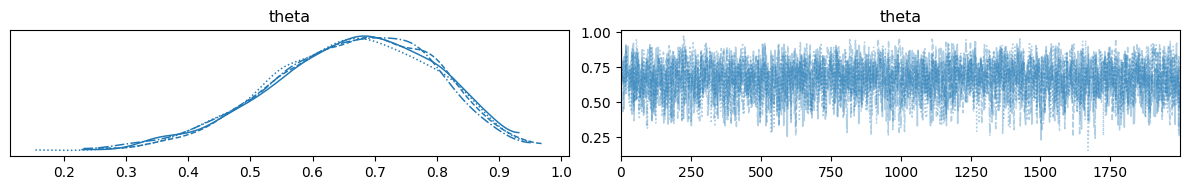

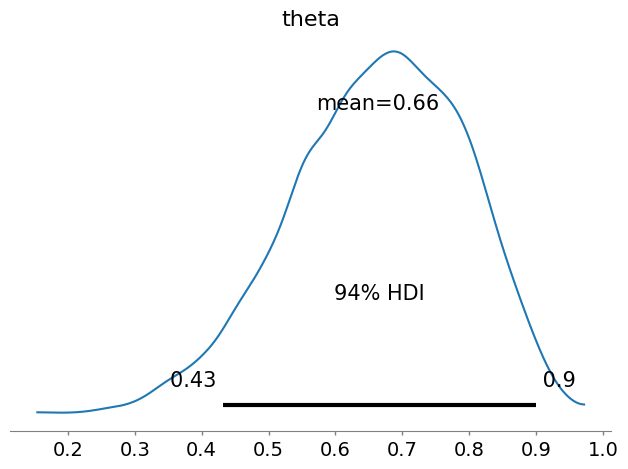

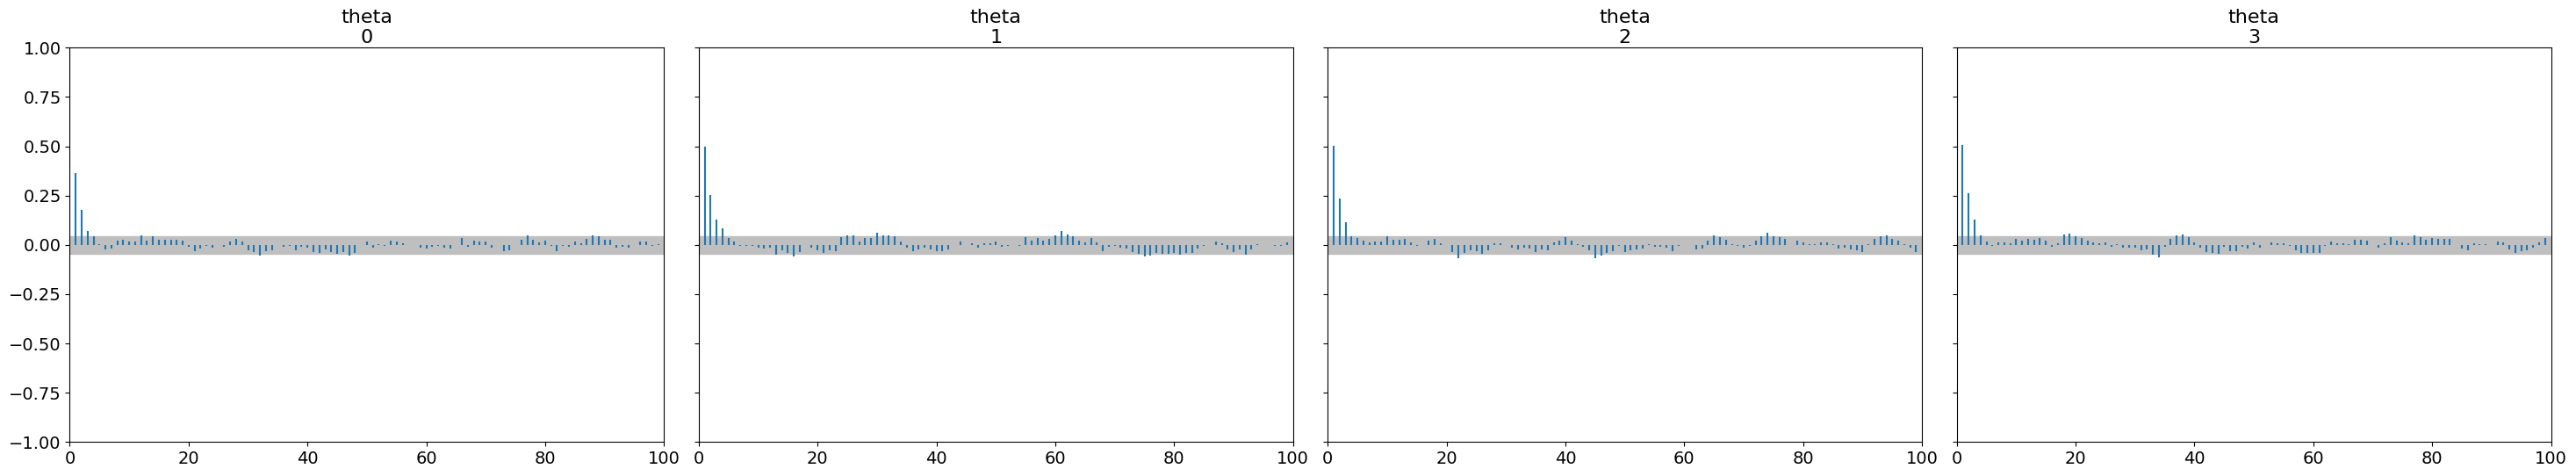

         mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd   ess_bulk  \
theta  0.6633  0.1286  0.4318   0.8999     0.0024   0.0014  2803.7716   

       ess_tail   r_hat  
theta  3596.196  1.0004  


In [2]:
# pip install pymc arviz matplotlib numpy
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# --- データ：10回中7回表 ---
n = 10
k = 7

with pm.Model() as model:
    # 事前分布（例：一様）
    theta = pm.Beta("theta", alpha=1, beta=1)
    # 尤度
    y = pm.Binomial("y", n=n, p=theta, observed=k)

    # MCMC
    idata = pm.sample(
        draws=2000,
        tune=1000,
        chains=4,
        target_accept=0.9,
        random_seed=42
    )

# --- 1) トレース（鎖の動き） ---
az.plot_trace(idata, var_names=["theta"])
plt.tight_layout()
plt.show()

# --- 2) 事後分布（密度 + HDI） ---
az.plot_posterior(idata, var_names=["theta"], hdi_prob=0.94)
plt.tight_layout()
plt.show()

# --- 3) 自己相関 ---
az.plot_autocorr(idata, var_names=["theta"])
plt.tight_layout()
plt.show()

# --- 4) 収束・効率の数値（R-hat, ESSなど） ---
print(az.summary(idata, var_names=["theta"], round_to=4))
